<center><img src="img/aism_logo.png" alt="Logo AI Saturdays Madrid" title="Logo AI Saturdays Madrid" width="150"/></center>

# Week 1 Challenge - Bank Classifier

Las campañas de marketing de los bancos dependen de los datos de los clientes. La cantidad de datos que manejan los bancos es tan grande, que es imposible que un analista de datos saque el máximo partido a esta información de modo que pueda ser útil de forma realmente efectiva en el proceso de toma de decisiones.

Aquí es donde los modelos de aprendizaje automático están ayudando a aumentar de forma drástica el mejor desempeño de estas campañas al permitir encontrar patrones en los datos que de otro modo pasarían desapercibidos para los analistas.

## Dataset

El conjunto de datos con el que vamos a trabajar en este challenge está relacionado con una campaña de marketing directo de una institución bancaria portuguesa. Durante la campaña, basada en llamadas telefónicas, a menudo se ha requerido más de un contacto con el mismo cliente para ofrecerle la contratación de un depósito bancario.

Nuestro objetivo es predecir si el cliente se suscribirá a un depósito a plazo, analizando y preprocesando los datos. Esos datos se utilizarán después para  construir un modelo de clasificación utilizando el algoritmo k-NN.

Las variables de entrada o características son:
* `age` - Edad del cliente.
* `job` - Tipo de trabajo que desempeña el cliente.
* `marital` - Estado civil.
* `education` - Nivel educativo.
* `default` - Indica si tiene crédito en mora.
* `balance` - Balance del saldo del cliente.
* `housing` - Indica si tiene contratada una hipoteca.
* `loan` - Indica si tiene un crédito personal.
* `contact` -  Forma en la que se ha contactado con el cliente.
* `day` - Día del mes en el que se realizó el último contacto.
* `month` - Mes del año en el que se realizó el último contacto.
* `duration` - Duración del último contacto, en segundos. **¡Importante!** Este atributo afecta en gran medida la variable de salida (por ejemplo, si `duration= 0`, entonces `y='no'`). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después del final de la llamada, obviamente se conoce `y`. Por lo tanto, esta variable de entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista, ya que si no estaríamos ante lo que se conoce como fuga de datos _(data lekeage)_.
* `campaign` - Número de veces que se le ha contactado en esta campaña.
* `pdays` -  Número de días que han pasado después de que el cliente fue contactado por última vez desde una campaña anterior, `pdays=-1` si no se le ha contactado previamente.
* `previous` - Número de contactos realizados antes de esta campaña y para este cliente.
* `poutcome` - Resultado de la campaña de marketing anterior.

La variable que queremos predecir es `y`, la cual indica si el cliente finalmente ha suscrito un depósito a plazo o no.

Puedes encontrar más información de este dataset en [UCI Machine Learning Repository - Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

## Importar librerías

A continuación, te dejamos indicadas las librerías que creemos que vas a necesitar importar para completar el _challenge_, pero puedes importar las que creas necesarias.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

## Cargar los datos

**Crear un DataFrame llamado `data` a partir del CSV que contiene los datos de la campaña de marketing. ¡Ojo con el separador!**

In [3]:
data = pd.read_csv("bank.csv", sep=';')

## Exploración general del dataset

**Muestra las 10 primeras filas del conjunto de datos.**

In [4]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Imprime el número de filas (registros u observaciones) y columnas (variables o características) del conjunto de datos.**

In [5]:
data.shape

(45211, 17)

**Muestra la información general del dataset.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Muestra el número de valores únicos en cada columna.**

In [7]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Number of unique values for column '{column}': {len(unique_values)}")

Number of unique values for column 'age': 77
Number of unique values for column 'job': 12
Number of unique values for column 'marital': 3
Number of unique values for column 'education': 4
Number of unique values for column 'default': 2
Number of unique values for column 'balance': 7168
Number of unique values for column 'housing': 2
Number of unique values for column 'loan': 2
Number of unique values for column 'contact': 3
Number of unique values for column 'day': 31
Number of unique values for column 'month': 12
Number of unique values for column 'duration': 1573
Number of unique values for column 'campaign': 48
Number of unique values for column 'pdays': 559
Number of unique values for column 'previous': 41
Number of unique values for column 'poutcome': 4
Number of unique values for column 'y': 2


**Comprueba la existencia de valores nulos en el dataset.**

In [8]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**Muestra una descripción estadística básica del dataset.**

In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Según su tipo, cuáles de las variables de entrada son categóricas y cuáles numéricas.**

In [10]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

In [11]:
for column in data.columns:
    if is_numeric_dtype(data[column]):
        print(f"The colum '{column}' is a Numeric type.")

The colum 'age' is a Numeric type.
The colum 'balance' is a Numeric type.
The colum 'day' is a Numeric type.
The colum 'duration' is a Numeric type.
The colum 'campaign' is a Numeric type.
The colum 'pdays' is a Numeric type.
The colum 'previous' is a Numeric type.


In [12]:
for column in data.columns:
    if data[column].dtype == "object":
        print(f"The colum '{column}' is a Categorical type.")

The colum 'job' is a Categorical type.
The colum 'marital' is a Categorical type.
The colum 'education' is a Categorical type.
The colum 'default' is a Categorical type.
The colum 'housing' is a Categorical type.
The colum 'loan' is a Categorical type.
The colum 'contact' is a Categorical type.
The colum 'month' is a Categorical type.
The colum 'poutcome' is a Categorical type.
The colum 'y' is a Categorical type.


**Muestras los posibles valores de cada una de las variables categóricas y sus valores absolutos.**

In [13]:
for column in data.columns:
    if data[column].dtype == "object":
        print(data[column].value_counts())
        print("-"*20, "\n")

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
-------------------- 

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
-------------------- 

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
-------------------- 

default
no     44396
yes      815
Name: count, dtype: int64
-------------------- 

housing
yes    25130
no     20081
Name: count, dtype: int64
-------------------- 

loan
no     37967
yes     7244
Name: count, dtype: int64
-------------------- 

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
-------------------- 

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr   

## Análisis exploratorio de la variable objetivo

**La variable objetivo es aquella que queremos predecir. Antes de comenzar a hacer modificaciones en el dataset, vamos a crearnos una copia sobre la que vamos a trabajar para conservar así el original sin cambios. Para ello crea un nuevo DataFrame llamado `bank_data` que sea una copia del original.**

In [14]:
bank_data = data.copy()

**Cambia el nombre de la variable objetivo `y` por `deposit`.**

In [15]:
bank_data.rename(columns={"y": "deposit"}, inplace=True)
bank_data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


**Cambia los valores de la variable `deposit` de `yes/no` por `1/0` respectivamente.**

In [16]:
bank_data["deposit"] = bank_data['deposit'].map({'yes': 1, 'no': 0})
bank_data['deposit'].head(5)

,deposit
0,0
1,0
2,0
3,0
4,0


**Visualiza la variable objetivo con un countplot. ¿Qué conclusión sacas?**

**_Conclusión:_**

Como se puede observar en el `pairplot` de abajo hay un desvalance muy grande entre cuantos usuarios tiene o no un deposito.

<Axes: xlabel='deposit', ylabel='count'>

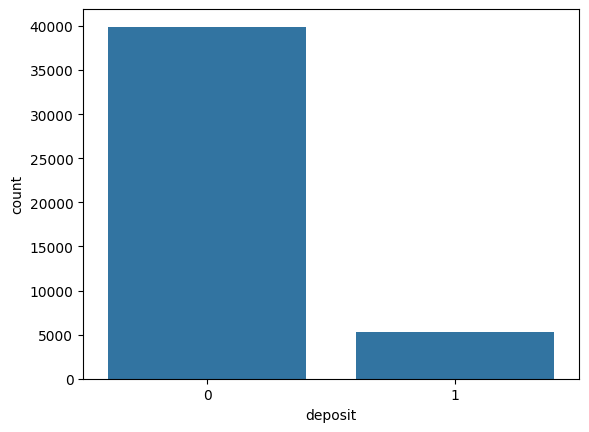

In [17]:
sns.countplot(bank_data, x="deposit")

## Análisis exploratorio de las variables predictoras

**Muestra la distribución por edades de los clientes. Usa el tipo de visualización que quieras.**

<Axes: xlabel='age', ylabel='Count'>

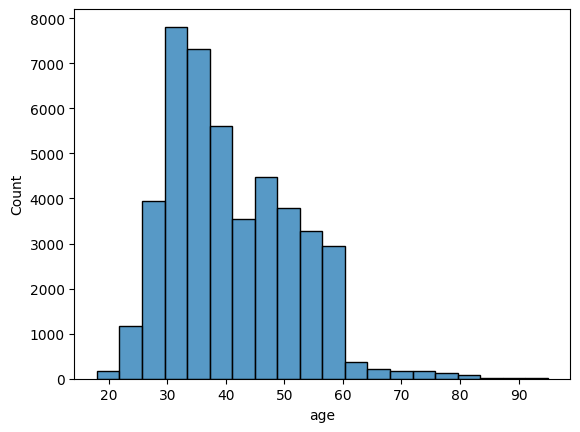

In [18]:
sns.histplot(data=data, x='age', bins=20)

**Crea un barplot para cada una de las variables predictoras categóricas del dataset en función de la variable de salida.**

In [19]:
categorical_vars = []
for column in data.columns:
    if data[column].dtype == "object" and column != "y":
        categorical_vars.append(column)
print(categorical_vars)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


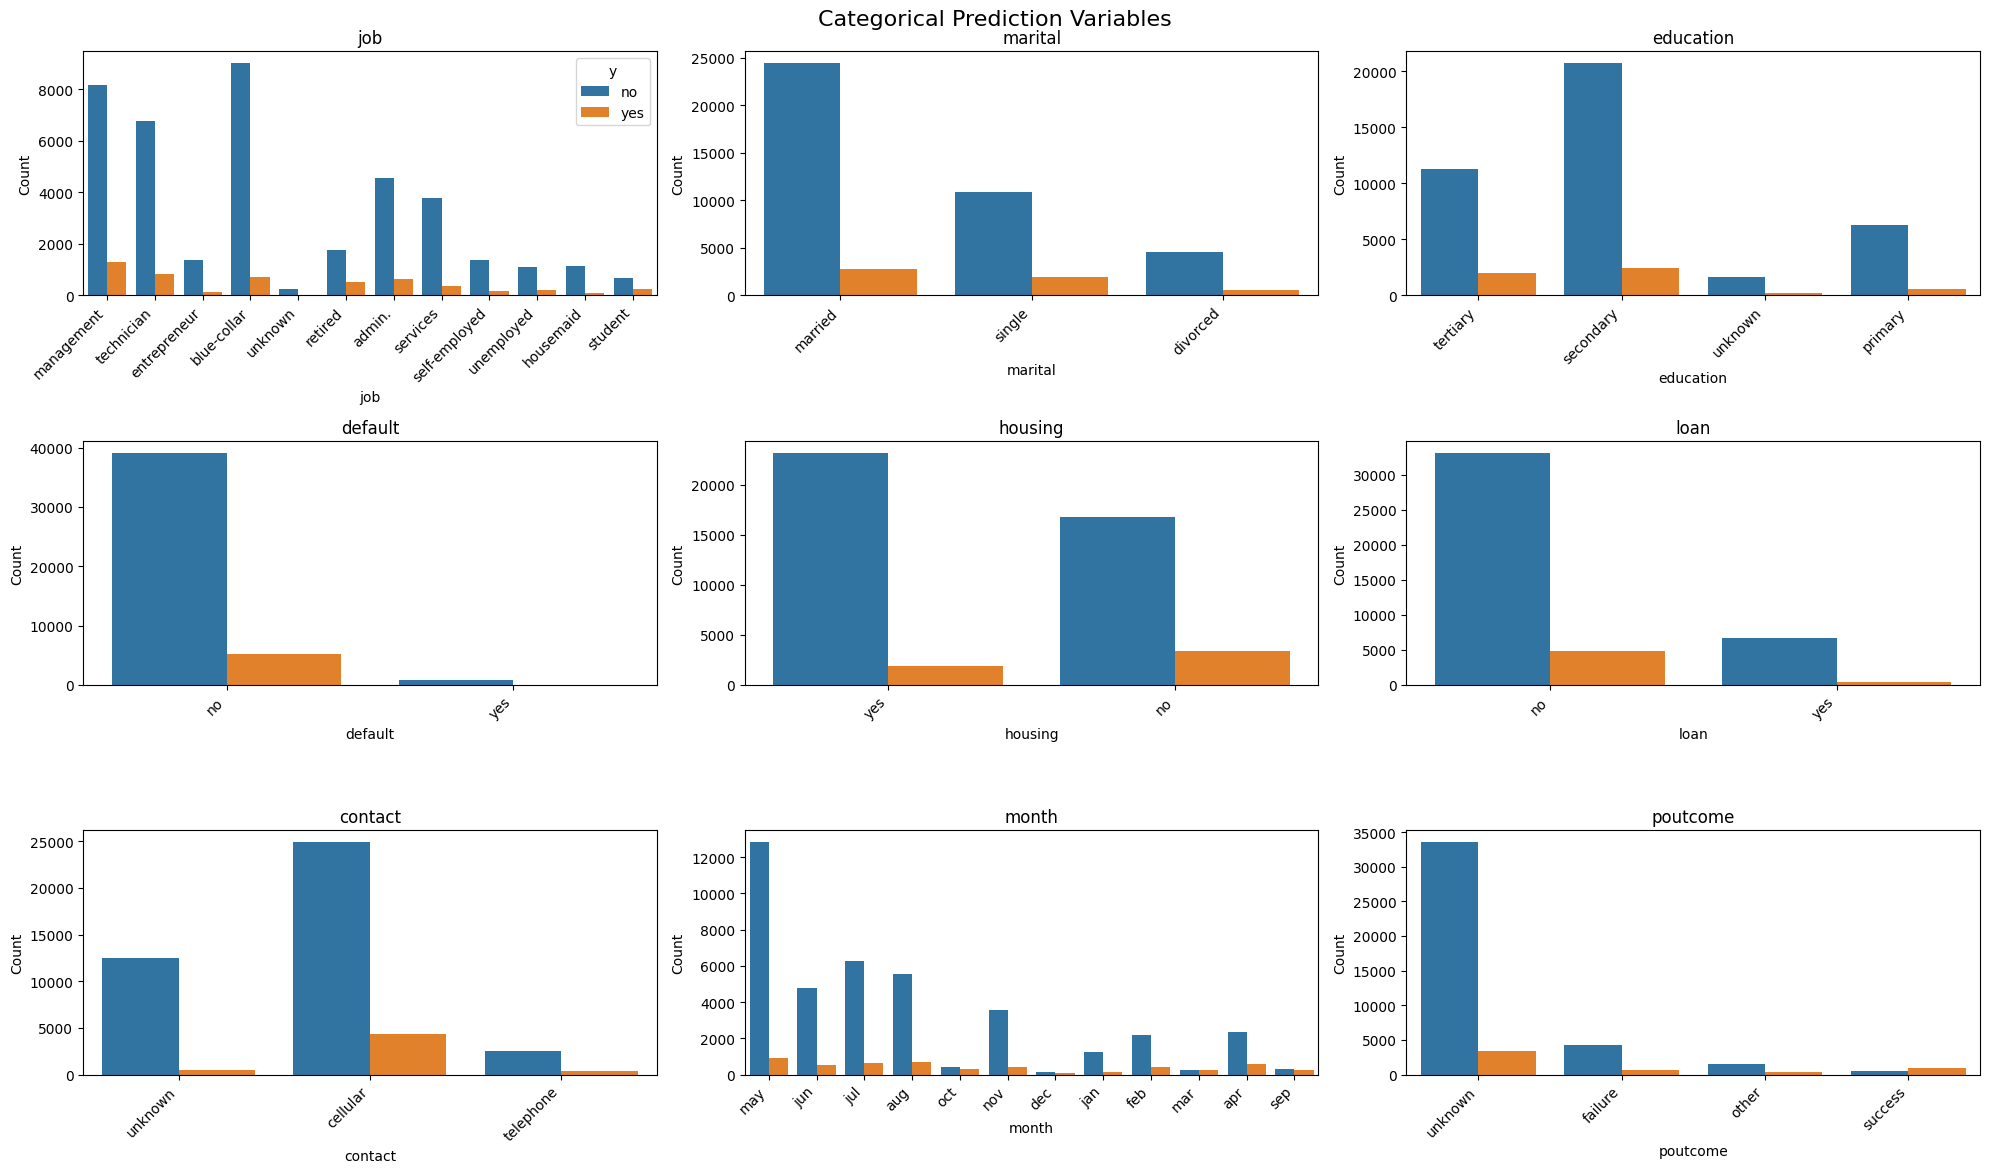

In [20]:
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Categorical Prediction Variables', fontsize=16)

for idx, cate_var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, idx)

    sns.countplot(data=data, x=cate_var, hue='y')

    plt.title(cate_var)
    plt.xlabel(cate_var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    if idx != 1:
        plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

**Usa un pairplot para mostrar la distribución y las relaciones de las variables numéricas predictoras en base a la variable de salida.**

In [21]:
numerical_vars = []
for column in data.columns:
    if is_numeric_dtype(data[column]):
        numerical_vars.append(column)
print(numerical_vars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


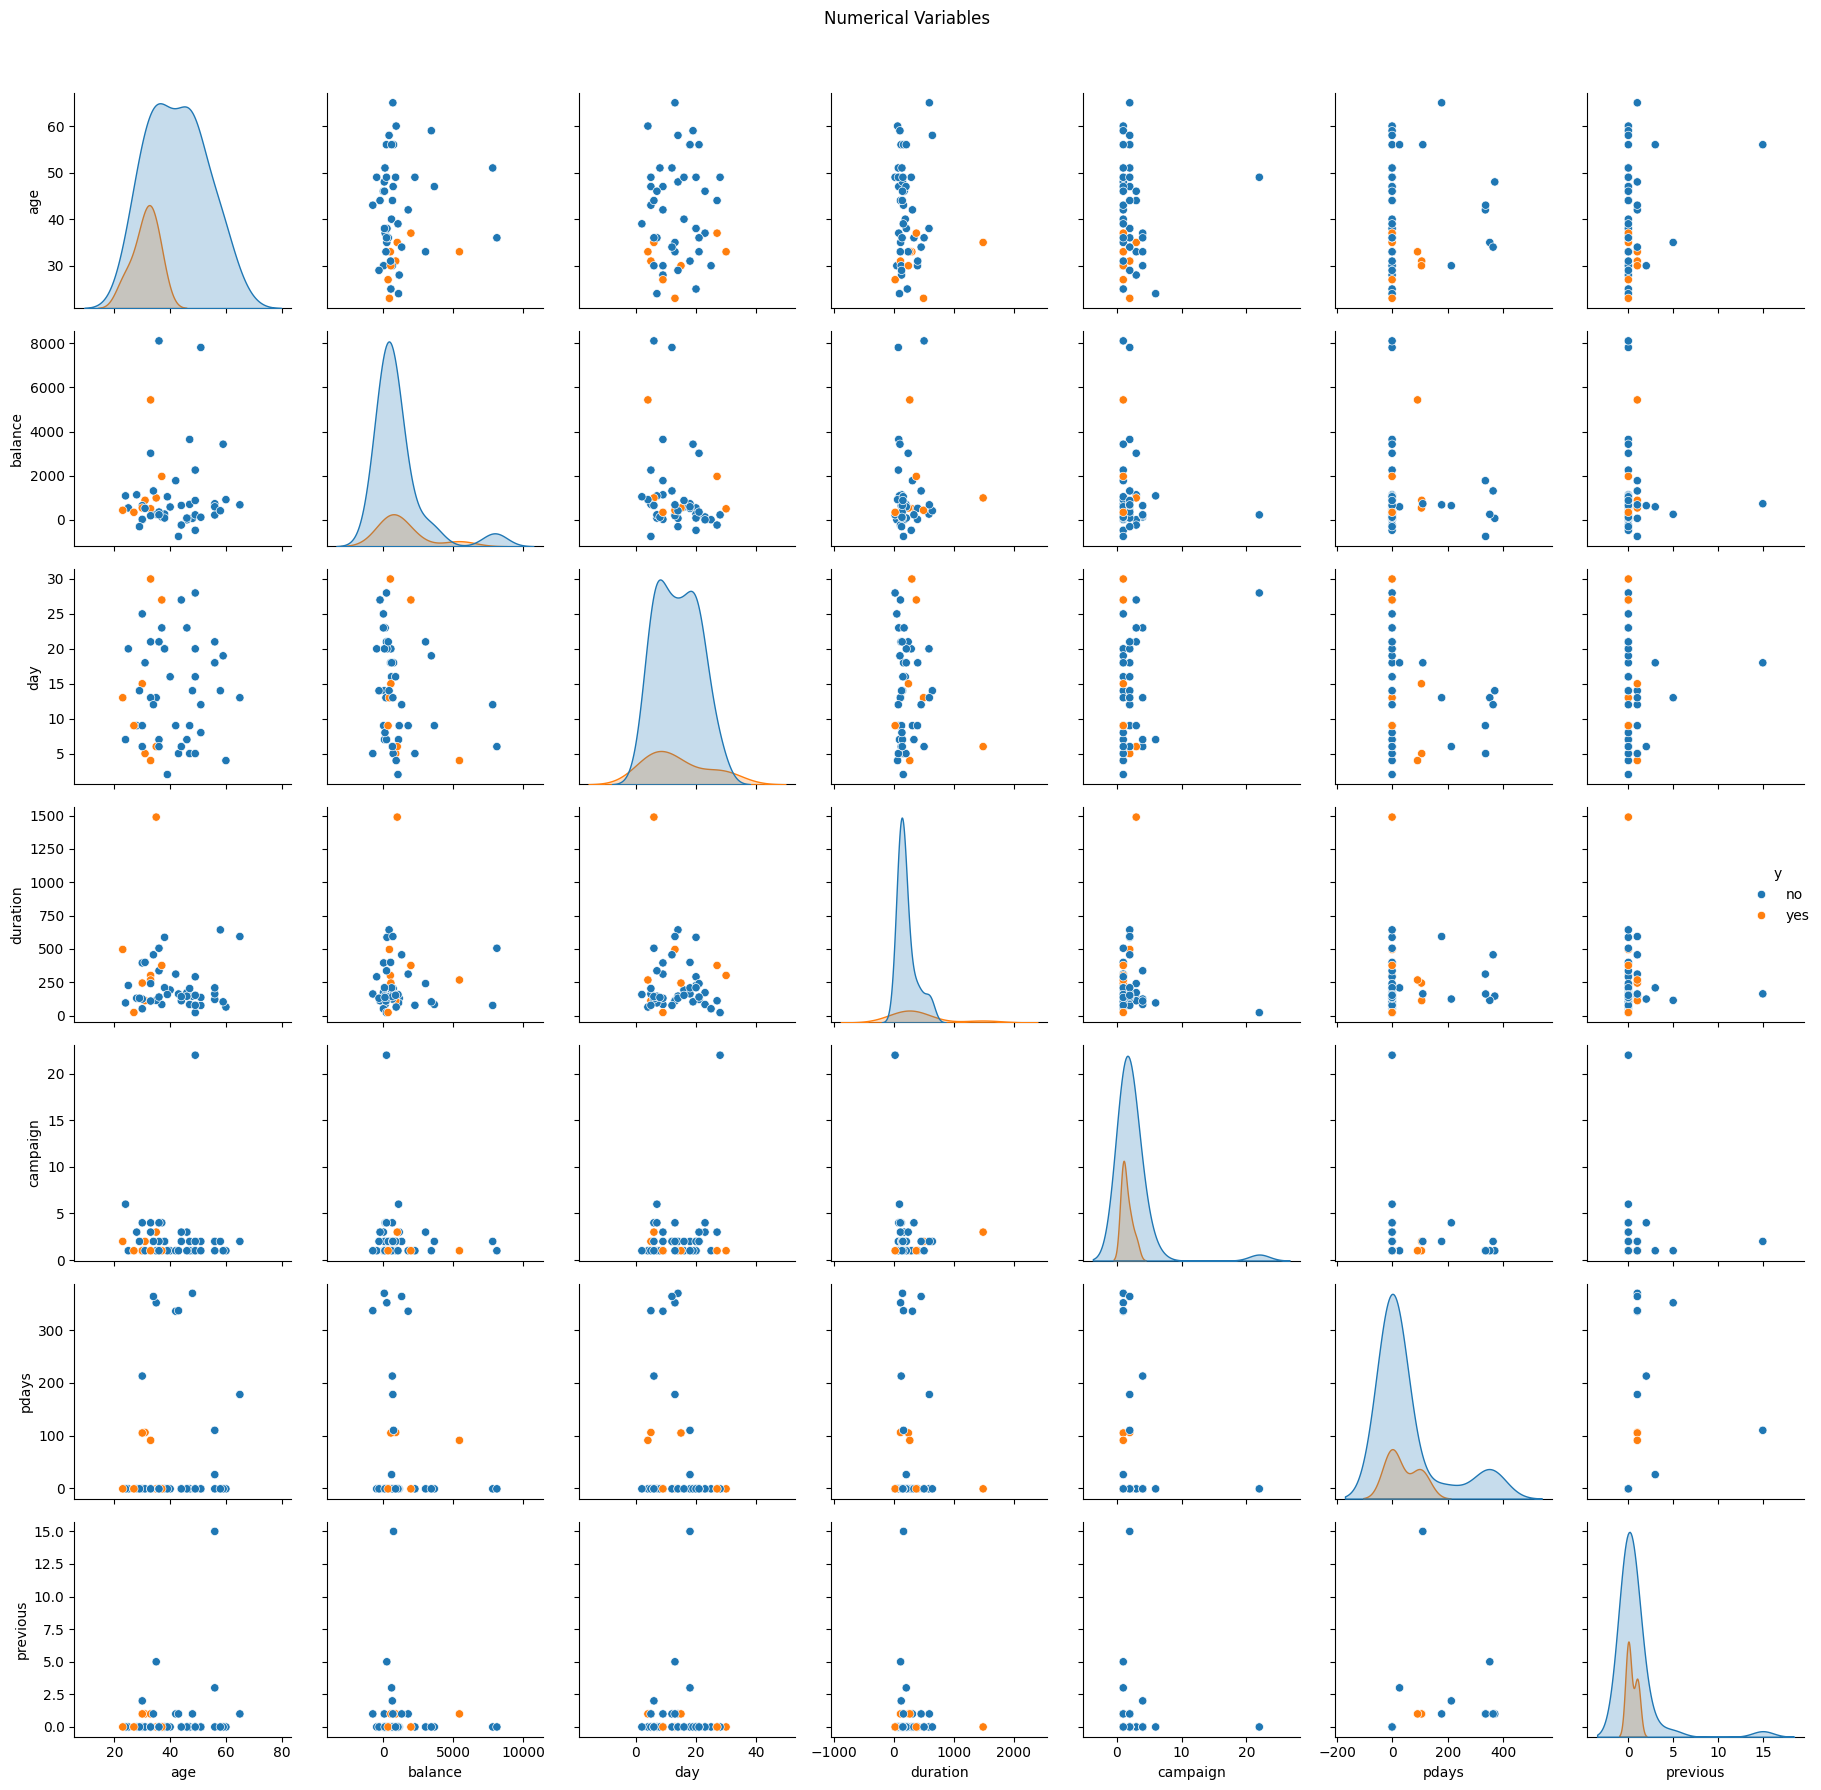

In [22]:
sample_size = 50  # Change this number for faster ploting
data_sample = data.sample(n=sample_size, random_state=42)

sns.pairplot(data = data_sample[numerical_vars + ['y']], hue='y', vars=numerical_vars)
plt.suptitle('Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

**Transforma los meses en su correspondiente número, y muestra el conteo antes y después para ver que has realizado la modificación correctamente.**

In [23]:
data['month'].value_counts()

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


In [24]:
months = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

data['month'] = data['month'].map(months)
data['month'].value_counts().sort_index()

,count
month,
1,1403
2,2649
3,477
4,2932
5,13766
6,5341
7,6895
8,6247
9,579


**Transforma las variables categóricas binarias `default`, `housing` y `loan` en variables numéricas de tipo `0/1`. A continuación, muéstralas para ver que la transformación ha sido correcta.**

In [25]:
data[["default", "housing", "loan"]].head(5)

,default,housing,loan
0,no,yes,no
1,no,yes,no
2,no,yes,yes
3,no,yes,no
4,no,no,no


In [26]:
data["default"] = data['default'].map({'yes': 1, 'no': 0})
data["housing"] = data['housing'].map({'yes': 1, 'no': 0})
data["loan"] = data['loan'].map({'yes': 1, 'no': 0})
data[["default", "housing", "loan"]].head(5)

,default,housing,loan
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,0
4,0,0,0


**Cuántos clientes NO han sido contactados nunca.**

In [27]:
sum(data["pdays"] == -1)

36954

**De los clientes que fueron contactados previamente, ¿cuántos días han pasado desde que contactaron al primero?**

In [28]:
print(f"{data['pdays'].max()} days since last ")

871 days since last 


**Realiza 3 consultas que te parezcan interesantes al conjunto de datos similares a las dos anteriores usando lo que aprendiste en el notebook de práctica. Otro ejemplo: "¿Qué clientes que trabajan como técnicos han contratado un depósito?".**

In [29]:
avg = data[(data['marital'] == 'married') & (data['housing'] == 1)]['balance'].mean()
print(f"The average valance for married clients who have a house loan: {round(avg, 2)}€")

The average valance for married clients who have a house loan: 1202.22€


In [30]:
avg_duration_yes = data[data['y'] == 'yes']['duration'].mean()
avg_duration_no = data[data['y'] == 'no']['duration'].mean()
print(f"Average call duration for clients who are subscribed: {round(avg_duration_yes, 2)}s")
print(f"Average call duration for clients who are not subscribed: {round(avg_duration_no, 2)}€")

Average call duration for clients who are subscribed: 537.29s
Average call duration for clients who are not subscribed: 221.18€


In [31]:
young_single_positive = sum((data['marital'] == 'single') &
                            (data['age'] < 30) &
                            (data['balance'] > 0))
print(f"Number of single people over thirty with positive valance: {young_single_positive}")

Number of single people over thirty with positive valance: 3295


**Muestra 2 visualizaciones que te parezcan interesantes usando los datos del dataset e indica qué conclusiones sacas de ellas. Por ejemplo: "Crea un scatterplot con la edad del cliente y el dinero que tiene en la cuenta (`balance`)".**

En el _Boxplot_ de abajo podemos ver cuanto diner tienen los usuarios en sus cuentas categorizados por su nivel educativo. Podemos observar que aquellos que tienen un nivel mayor de educación también tienden a tener más balance en sus cuentas. En todos los casos también vemos outliyers que se separan del resto de su conjunto pero incluso los outliyers siguen el patron de tener más balance cuanto mayor es el nivel educativo.

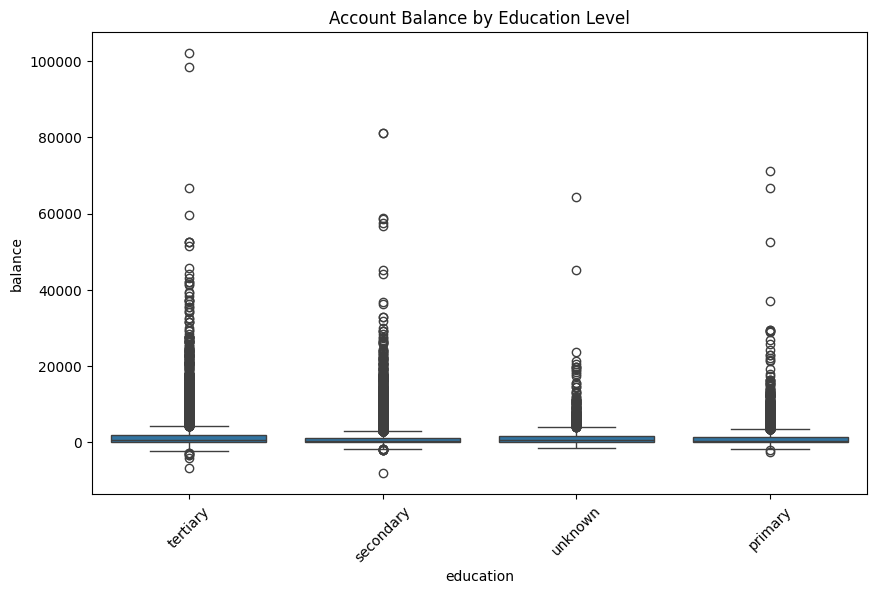

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='education', y='balance')
plt.title('Account Balance by Education Level')
plt.xticks(rotation=45)
plt.show()

Sobre el _Violin plot_ de abajo podemos sacar varias conclusiones interesantes.

Podemos ver como los dos empleos más distintivos son el de jubilados y estudiantes que hay más estudiantes cuanto más joven se es y hay más juvilados a mayores edades.

También Hay mucha gente joven en oficios de _self-employed_ y en _technician_ lo que puede sugerir que los jovenes adoptan más los estos nuevos roles mientras que en _housemaid_ hay gente más mayor lo que puede reflejar más preferencia por trabajos más tradicionales.

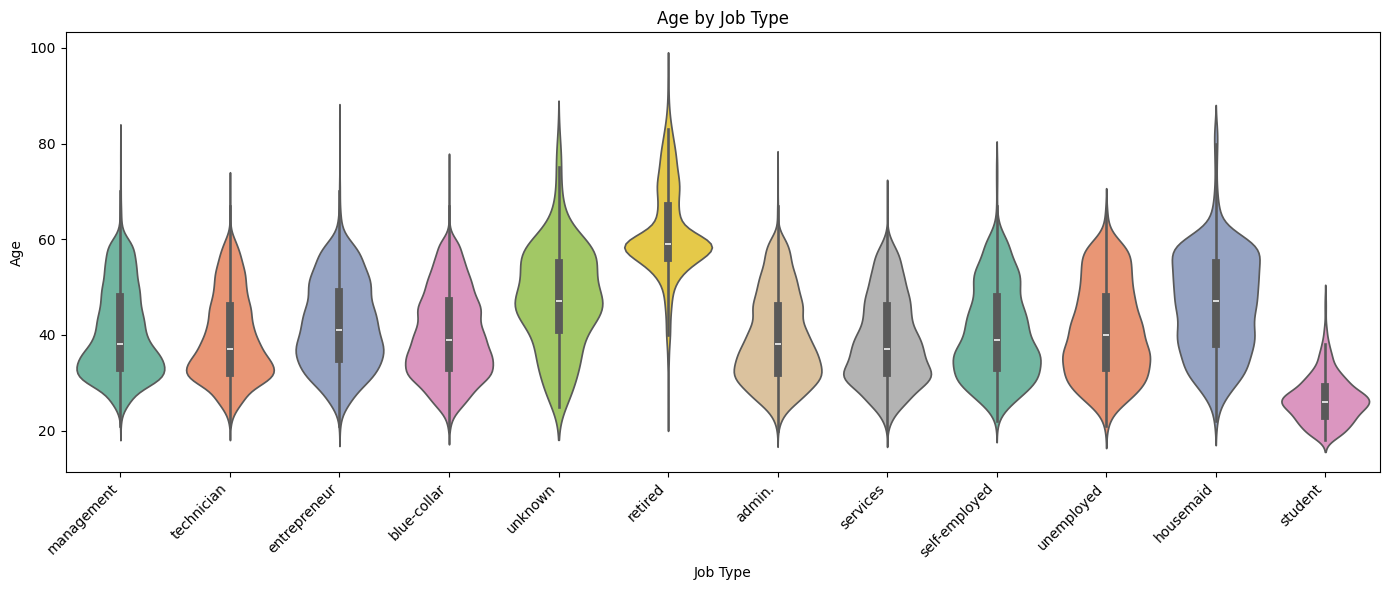

In [33]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=data, x='job', y='age', palette='Set2', hue='job')
plt.title('Age by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Sustituye el valor -1 de `pdays` por un valor grande (por ejemplo 10.000) para que refleje que hace mucho que no se le ha contactado (similar a no haberle contactado nunca).**

In [34]:
data['pdays'].value_counts().sort_index().head(10)

,count
pdays,
-1,36954
1,15
2,37
3,1
4,2
5,11
6,10
7,7
8,25


In [35]:
data['pdays'] = data['pdays'].replace(-1, 10000)
data['pdays'].value_counts().sort_index().head(10)

,count
pdays,
1,15
2,37
3,1
4,2
5,11
6,10
7,7
8,25
9,12


**Crea una nueva columna llamada `recent_pdays` que refleje aquellos contactos que son más recientes con los valores mas grandes, y los que nunca se les ha contactado con los valores más pequeños (siempre positivos). Para esto, haz el inverso del valor de `pdays`.**

In [36]:
max_pdays = data['pdays'].max()
data['recent_pdays'] = max_pdays - data['pdays']
print(data[['pdays', 'recent_pdays']].head(20))

    pdays  recent_pdays
0   10000             0
1   10000             0
2   10000             0
3   10000             0
4   10000             0
5   10000             0
6   10000             0
7   10000             0
8   10000             0
9   10000             0
10  10000             0
11  10000             0
12  10000             0
13  10000             0
14  10000             0
15  10000             0
16  10000             0
17  10000             0
18  10000             0
19  10000             0


**Comprueba los valores mínimo y máximo de la variable `recent_pdays`.**

In [37]:
max_val = data['recent_pdays'].max()
min_val = data['recent_pdays'].min()
print(f"Recent pdays max value is: {max_val}")
print(f"Recent pdays max value is: {min_val}")

Recent pdays max value is: 9999
Recent pdays max value is: 0


**Puesto que ya no la necesitamos, elimina la columna `pdays`.**

In [38]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,recent_pdays
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,10000,0,unknown,no,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,10000,0,unknown,no,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,10000,0,unknown,no,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,10000,0,unknown,no,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,10000,0,unknown,no,0


In [39]:
data.drop('pdays', axis=1, inplace=True)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,recent_pdays
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0,unknown,no,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,0,unknown,no,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,0,unknown,no,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,0,unknown,no,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,0,unknown,no,0


**Dentro de la variable `poutcome` incluye los `other` dentro de los `unknown`, ya que realmente no sabemos qué representan y no parece tener mucho sentido tener ambas separadas. Muestra un conteo de esta variable para ver el resultado.**

In [40]:
print(data["poutcome"].value_counts())
print("\n", "-"*20, "\n")

data['poutcome'] = data['poutcome'].replace('other', 'unknown')

print(data["poutcome"].value_counts())

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

 -------------------- 

poutcome
unknown    38799
failure     4901
success     1511
Name: count, dtype: int64


**Eliminamos `contact`, ya que no nos aporta información, y la columna `duration` ya que en el enunciado nos advierten que esta información no está realmente disponible a la hora de hacer la predicción y nos haría incurrir en una fuga de datos.**

In [41]:
data.drop(['contact', 'duration'], axis=1, inplace=True)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,poutcome,y,recent_pdays
0,58,management,married,tertiary,0,2143,1,0,5,5,1,0,unknown,no,0
1,44,technician,single,secondary,0,29,1,0,5,5,1,0,unknown,no,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,5,1,0,unknown,no,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,5,1,0,unknown,no,0
4,33,unknown,single,unknown,0,1,0,0,5,5,1,0,unknown,no,0


**Para poder pasarle los datos al algoritmo k-NN necesitamos convertir todas las variables categóricas a numéricas. Para ello vamos a usar un método conocido como _one-hot encoding_, que lo que hace es asignar a cada categoría un vector que contiene `1s` y `0s`, lo que denota la presencia o ausencia de esa característica. Usa la función `get_dummies()` de Pandas.**

In [42]:
data = pd.get_dummies(data, drop_first=True)
data.head(5)

,age,default,balance,housing,loan,day,month,campaign,previous,recent_pdays,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_success,poutcome_unknown,y_yes
0,58,0,2143,1,0,5,5,1,0,0,...,False,False,True,False,False,True,False,False,True,False
1,44,0,29,1,0,5,5,1,0,0,...,False,False,False,True,True,False,False,False,True,False
2,33,0,2,1,1,5,5,1,0,0,...,False,False,True,False,True,False,False,False,True,False
3,47,0,1506,1,0,5,5,1,0,0,...,False,False,True,False,False,False,True,False,True,False
4,33,0,1,0,0,5,5,1,0,0,...,False,True,False,True,False,False,True,False,True,False


**Muestra la matriz de correlación de las variables.**

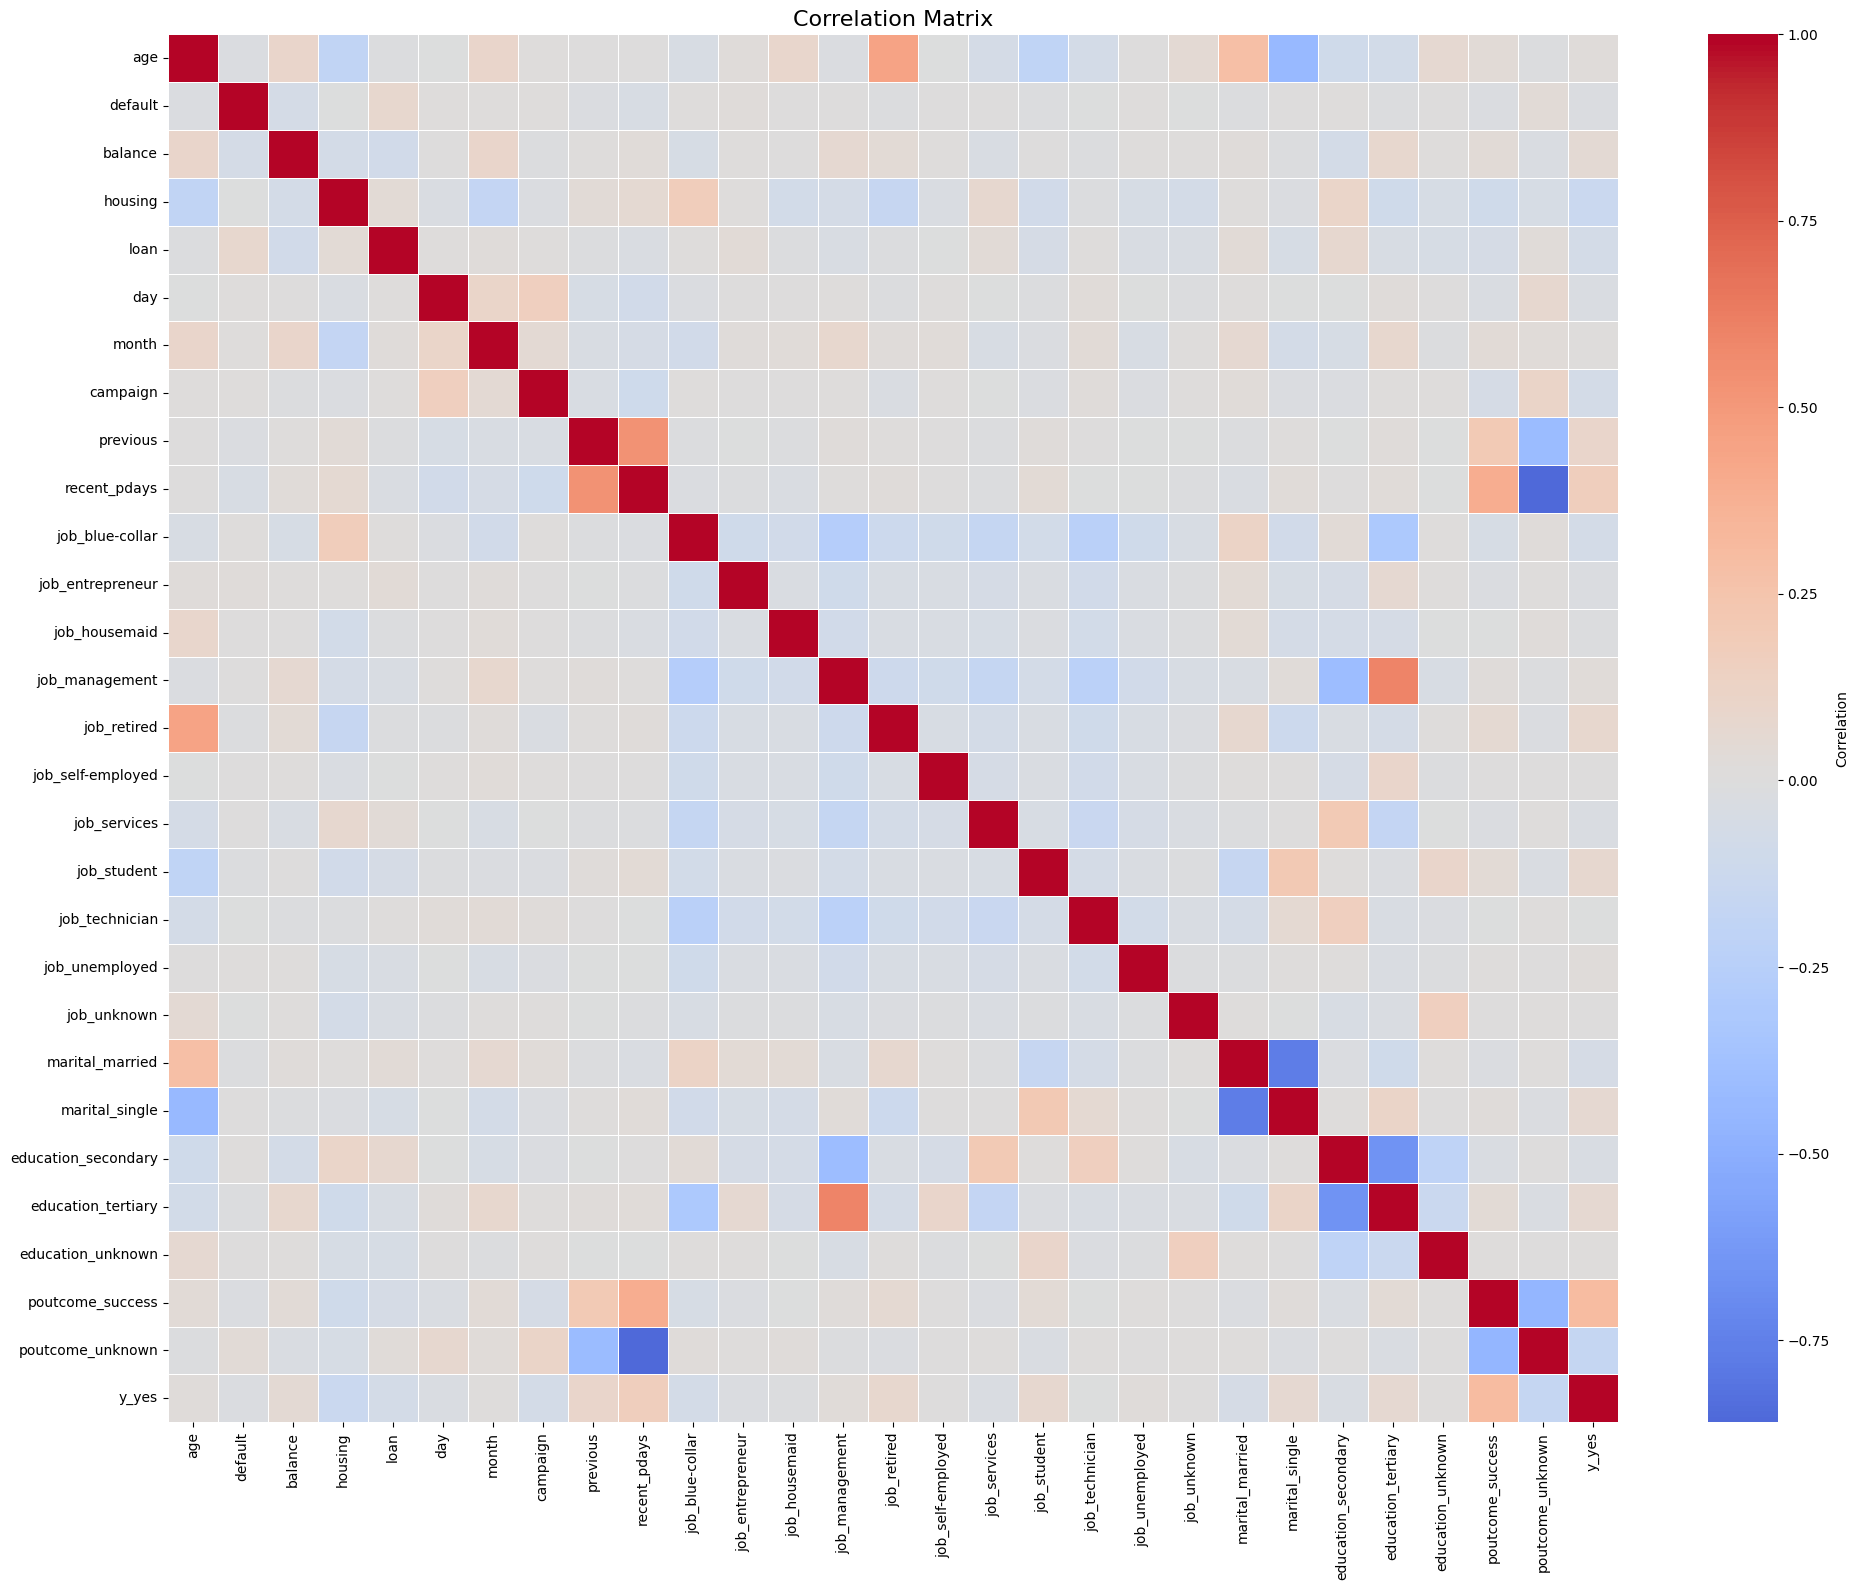

In [43]:
correlation_matrix = data.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

## División conjuntos de entrenamiento y prueba

Vamos a dividir nuestro conjunto de datos en dos subconjuntos, uno de entrenamiento con el que vamos a entrenar el algoritmo y otro de prueba con el que vamos a medir el desempeño del algoritmo con datos nuevos que no ha visto nunca.

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

In [44]:
X = data.drop('y_yes', axis=1)
y = data['y_yes']

**Divide el dataset en los conjuntos de entrenamiento y prueba usando la función `train_test_split()` de la librería Scikit-Learn en una proporción de 75/25. ¿Para qué sirven los parámetros `random_state` y `stratify`?**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

## Normalización de los datos

Los algoritmos basados en el cálculo de distancias como k-NN funcionan mejor cuando los datos que les pasamos están normalizados. La normalización es una técnica de escalado en la que los puntos de datos se escalan para que encajen entre 0 y 1, es decir, es el proceso de reescalar los valores en un rango de [0, 1].

**Normaliza los datos de entrenamiento y prueba usando la función `MinMaxScaler()` de la librería Scikit-Learn.**

In [46]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Guardar como dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## Entrenamiento modelo

Vamos a usar el modelo _**k-Nearest Neighbors**_ para crear un clasificador que nos permita predecir a partir de los datos que tenemos si un cliente contratará o no el depósito a plazo como resultado de la campaña de marketing.

**Crea un clasificador k-NN y busca el número de vecinos más cercanos que mejor funciona. Prueba diferentes valores de `k`, por ejemplo entre 1 y 20.**

In [47]:
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    # Create and train
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on training and test sets
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

    print(f"k={k:2d} | Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")

# Find the best k
best_k = k_values[test_scores.index(max(test_scores))]
print(f"\n{'-'*60}")
print(f"Best k: {best_k} with Test Accuracy: {max(test_scores):.4f}")
print(f"{'-'*60}")


k= 1 | Train Accuracy: 1.0000 | Test Accuracy: 0.8415
k= 2 | Train Accuracy: 0.9154 | Test Accuracy: 0.8828
k= 3 | Train Accuracy: 0.9157 | Test Accuracy: 0.8768
k= 4 | Train Accuracy: 0.9036 | Test Accuracy: 0.8873
k= 5 | Train Accuracy: 0.9035 | Test Accuracy: 0.8854
k= 6 | Train Accuracy: 0.8995 | Test Accuracy: 0.8894
k= 7 | Train Accuracy: 0.9000 | Test Accuracy: 0.8889
k= 8 | Train Accuracy: 0.8971 | Test Accuracy: 0.8899
k= 9 | Train Accuracy: 0.8978 | Test Accuracy: 0.8901
k=10 | Train Accuracy: 0.8968 | Test Accuracy: 0.8903
k=11 | Train Accuracy: 0.8966 | Test Accuracy: 0.8921
k=12 | Train Accuracy: 0.8958 | Test Accuracy: 0.8916
k=13 | Train Accuracy: 0.8960 | Test Accuracy: 0.8923
k=14 | Train Accuracy: 0.8954 | Test Accuracy: 0.8922
k=15 | Train Accuracy: 0.8957 | Test Accuracy: 0.8921
k=16 | Train Accuracy: 0.8949 | Test Accuracy: 0.8915
k=17 | Train Accuracy: 0.8955 | Test Accuracy: 0.8918
k=18 | Train Accuracy: 0.8949 | Test Accuracy: 0.8913
k=19 | Train Accuracy: 0.895

**(Opcional) Muestra una gráfica con la evolución de la tasa de error en función de los diferentes valores de k.**

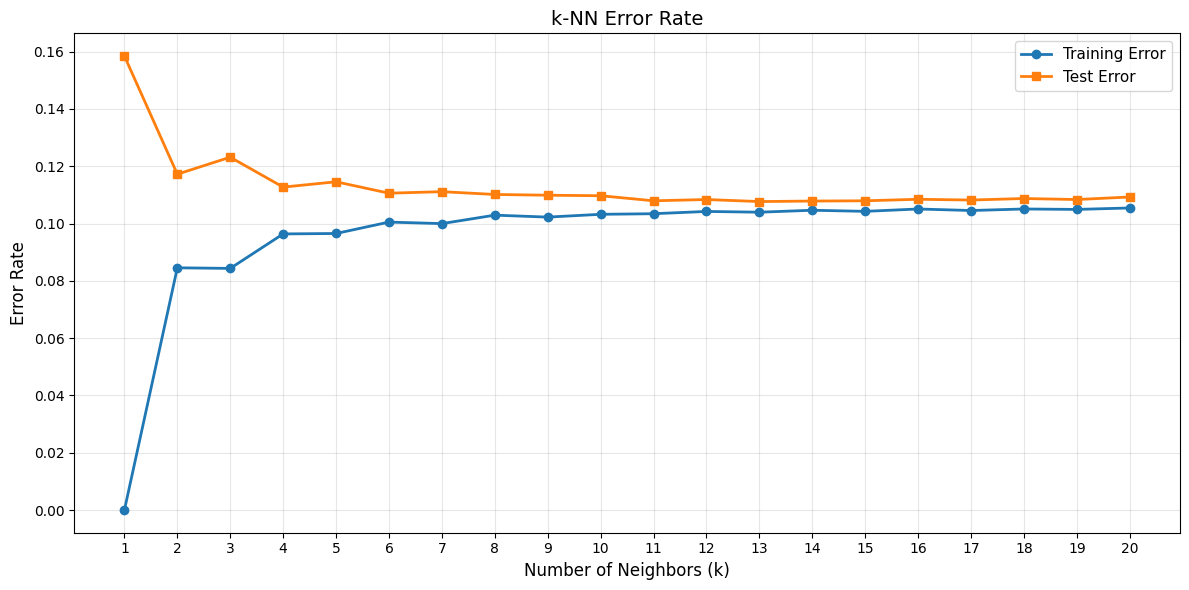

In [48]:
train_errors = [1 - score for score in train_scores]
test_errors = [1 - score for score in test_scores]

plt.figure(figsize=(12, 6))
plt.plot(k_values, train_errors, marker='o', label='Training Error', linewidth=2)
plt.plot(k_values, test_errors, marker='s', label='Test Error', linewidth=2)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('k-NN Error Rate', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

**(Opcional) Muestra una gráfica con la evolución del accuracy en función de los diferentes valores de k.**

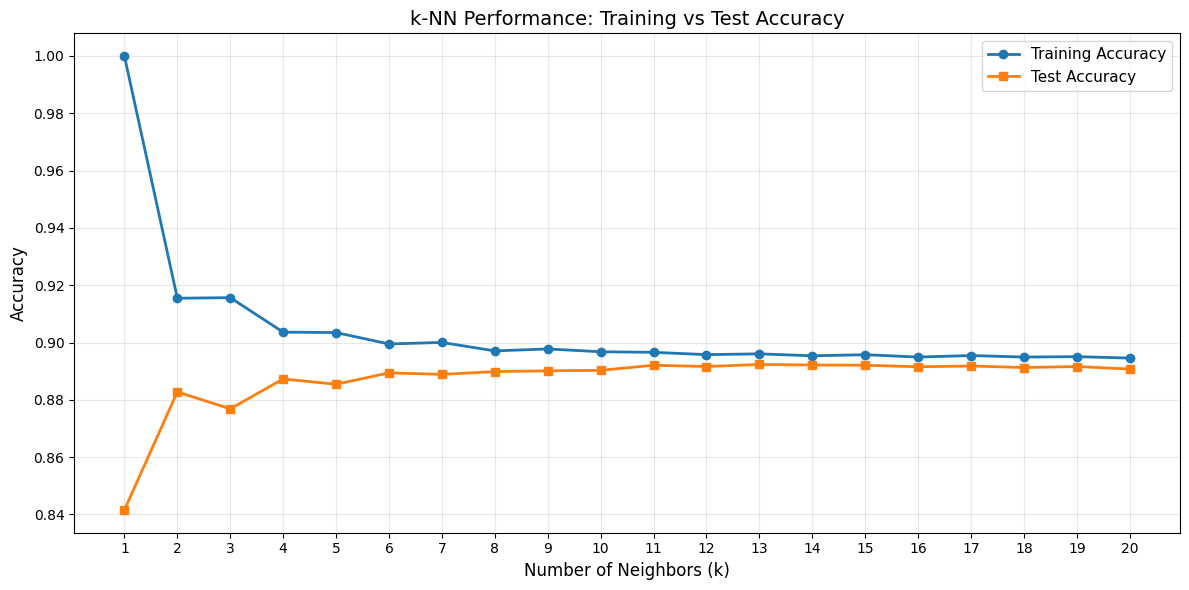

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('k-NN Performance: Training vs Test Accuracy', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

**Entrena de nuevo el clasificador con el `k` que has seleccionado.**

In [50]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

print(f"Final k-NN classifier trained with k={best_k}")
print(f"Training samples: {len(X_train_scaled)}")
print(f"Number of features: {X_train_scaled.shape[1]}")

Final k-NN classifier trained with k=13
Training samples: 33908
Number of features: 28


## Realizar predicciones

**Realiza las predicciones para el conjunto de prueba.**

In [51]:
y_pred = final_knn.predict(X_test_scaled)

print(f"\nPrediction distribution:")
print(pd.Series(y_pred).value_counts())
print(f"\nActual distribution:")
print(y_test.value_counts())


Prediction distribution:
False    10964
True       339
Name: count, dtype: int64

Actual distribution:
y_yes
False    9981
True     1322
Name: count, dtype: int64


## Evaluación del modelo

**Imprime el score para los conjuntos de entrenamiento y prueba del modelo que acabas de entrenar.**

In [52]:
train_score = final_knn.score(X_train_scaled, y_train)
test_score = final_knn.score(X_test_scaled, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"\nDifference: {abs(train_score - test_score):.4f}")

Training Score: 0.8960
Test Score: 0.8923

Difference: 0.0037


**Muestra la matriz de confunsión para el clasificador.**

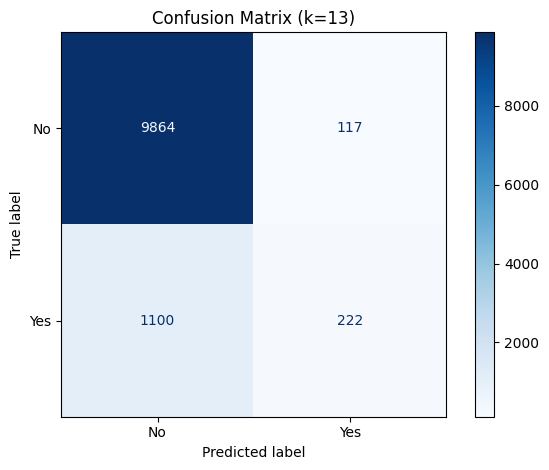

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix (k={best_k})')
plt.tight_layout()
plt.show()

**Imprime el informe de clasificación. ¿Qué conclusiones sacas?**

In [54]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.90      0.99      0.94      9981
         Yes       0.65      0.17      0.27      1322

    accuracy                           0.89     11303
   macro avg       0.78      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303



Viendo los resultados de la clasificación podemos sacar varias conclusiones:



1.   El dataset está muy desvalanceado: 80% `no`, 20% `si`
2.   Los `si` tienen un mal porcentaje de acierto
3.   Los `no` tienen muy bien porcentaje de acierto
4.   Tener un accuracy del _89%_ es engañoso ya que algunos de los datos se clasifican mejor que otros
5.   Para un negocio real, estaríamos fallando nuestras predicciones para nuestros usuarios suscriptos



**Por último, crea una visualización con la curva ROC y la métrica del área bajo la curva.**

In [61]:
# Calcula el área bajo la curva

y_pred_proba = final_knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

print(f"Area Under the Curve (AUC): {auc:.4f}")

Area Under the Curve (AUC): 0.6943


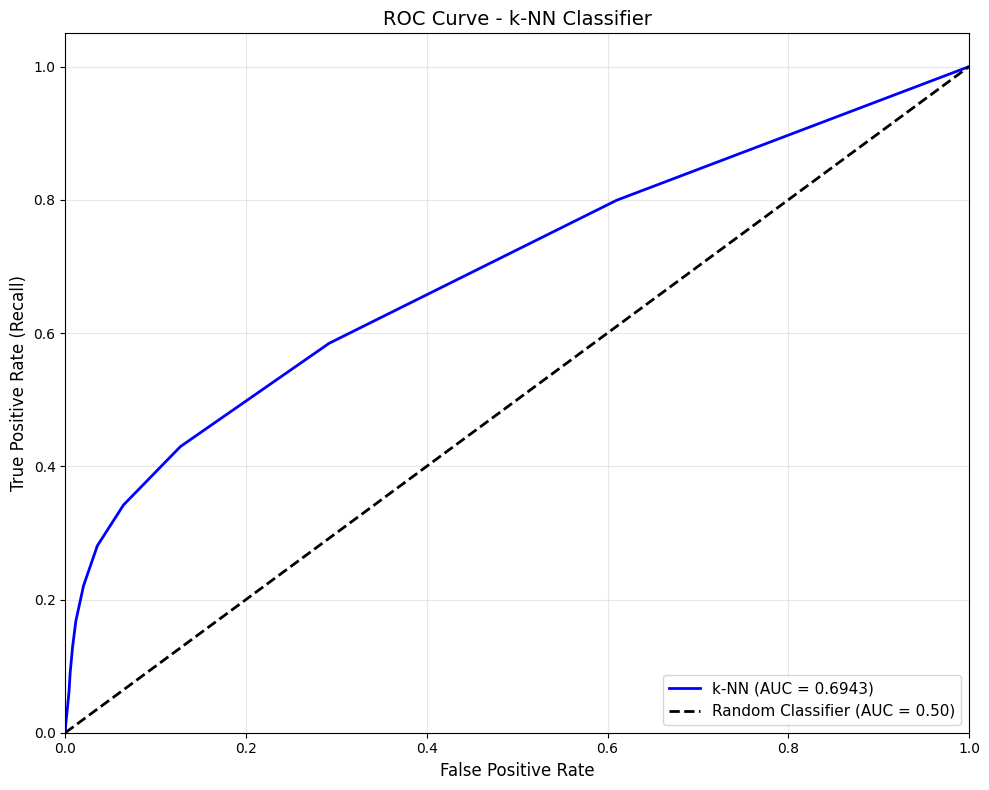

In [59]:
# Visualiza el área bajo la curva

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'k-NN (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve - k-NN Classifier', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()